###### Для достижения поставленной цели разделим данное исследование на несколько частей.
#### Часть 1. Изучение общей информации
#### Часть 2. Подготовка данных
- [2.1. Нахождение и заполнение пропусков и ошибок. Изменение типов данных.](#section2.1)
- [2.2. Расчет суммарных продаж компьютерных игр во всех регионах.](#section2.2)

#### Часть 3. Исследовательский анализ данных
- [3.1. Количество выпущенных игр по годам.](#section3.1)
- [3.2. Продажи компьютерных игр по платформам в разные годы.](#section3.2)
- [3.3. Продажи компьютерных игр по платформам в актуальный период.](#section3.3)
- [3.4. Зависимость продажи компьютерных игр по платформам от оценок критиков и пользователей.](#section3.4)
- [3.5. Распределение компьютерных игр по жанрам.](#section3.5)

#### Часть 4. Составление портрета пользователя каждого региона
- [4.1. Самые популярные платформы (топ-5) в Северной Америке, Европе и Японии.](#section4.1)
- [4.2. Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии.](#section4.2)
- [4.3. Зависимость продаж игр в Северной Америке, Европе и Японии от рейтинга ESRB.](#section4.3)
#### Часть 5. Статистический анализ данных
- [5.1. Проверка гипотезы №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#section5.1)
- [5.2. Проверка гипотезы №2.  Средние пользовательские рейтинги жанров Action и Sports разные.](#section5.2)
#### Заключение

### Часть 1. Изучение общей информации

Первым шагом настроим окружение: импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Просмотрим исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

In [2]:
games = pd.read_csv('/datasets/games.csv')
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Просмотрим информацию о типах данных таблиц.

In [3]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Вывод

Входные данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы содержат информацию о 16715 наименований игр. В таблице имеются 11 столбцов:
- 6 столбцов с вещественным типом данных - год выпуска, продажи в Северной Америке, продажи в Европе, продажи в Японии, продажи в других странах и оценка критиков;
- 5 столбцов со строковым типом данных - название игры, платформа, жанр игры, оценка пользователей, рейтинг игры от организации ESRB (Entertainment Software Rating Board).

Требуется предварительная обработка данных, включающая:
- обработку названий столбцов;
- нахождение и заполнение пропусков в столбцах - название игр, год выпуска игры, оценка критиков и пользователей и рейтинг игр.
- изменение типа данных в столбцах - год выпуска и оценка пользователей.

### Часть 2. Подготовка данных

Приведем к нижнему регистру названия стобцов в массиве данных.

In [4]:
games.columns = games.columns.str.lower()

<a id='section2.1'></a>
#### 2.1. Нахождение и заполнение пропусков и ошибок. Изменение типов данных.

Обработаем пропуски в столбцах из представленного массива данных:
- название игр;
- год выпуска игры;
- оценка критиков и пользователей;
- рейтинг игр от организации ESRB.

Создадим функцию для отображения доли пропущенных значений.

In [5]:
def missed_data_fraction(column):
    NaN_fraction = games[column].isnull().sum() / len(games)
    print('Доля пропущенных значений составляет: {:.1%}'.format(NaN_fraction))

###### 1) Название игр.
Просмотрим строки с пропущенными значениями.

In [6]:
display(games[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Помимо названия для указанных игр, отсутствуют данные жанра, оценок критиков и пользователей и рейтинг. Удалим соответствующие строки, так как это действие не повлияет на результат исследования.

In [7]:
games.dropna(subset=['name'], inplace=True)

###### 2) Год выпуска игры.

In [8]:
missed_data_fraction('year_of_release')

Доля пропущенных значений составляет: 1.6%


Однозначно оценить и заполнить пропущенные значения с годом выпуска игры затруднительно, заполним пропуски -1 и приведем тип данных из вещественного к целочисленному.

In [9]:
games['year_of_release'] = games['year_of_release'].fillna(-1).astype('int')

###### 3) Оценка критиков и пользователей

Определим долю пропущенных значений в данных оценок критиков и пользователей, соответственно.

In [10]:
missed_data_fraction('critic_score')
missed_data_fraction('user_score')

Доля пропущенных значений составляет: 51.3%
Доля пропущенных значений составляет: 40.1%


Заполним пропуски в оценках критиков и пользователей на -1.

In [11]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [12]:
# просмотрим уникальные значения столбца с рейтингом пользователя
display(games['user_score'].value_counts())

# приведем строковый тип данных в вещественный
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'] = games['user_score'].fillna(-1)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.9       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В данных имеются значения рейтинга "tbd", по-видимому, обозначающий, что рейтинг не определён. Пропуски заполнили значениями "-1". При переводе данных из строкового типа в вещественный использовали метод to_numeric() с параметром errors='coerce' для принудительной замены значений "tbd" на NaN.

###### 4) Рейтинг игр от организации ESRB

In [13]:
missed_data_fraction('rating')

Доля пропущенных значений составляет: 40.5%


Пропущенные значения в рейтинге игр отнесем к значению "другой".

In [14]:
games['rating'] = games['rating'].fillna('Other')

<a id='section2.2'></a> 
#### 2.2. Расчет суммарных продаж компьютерных игр во всех регионах.

Просуммируем продажи игр в Северной Америке, Европе, Японии и других странах и добавим столбец к массиву данных.

In [15]:
games['global_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

###### Просмотрим массив данных после предобработки.

In [16]:
display(games.head())
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Other,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
global_sales       16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


None

### Вывод

По результатам подготовки данных:
1. Приведены к нижнему регистру названия столбцов.
2. Обработаны пропуски в столбцах - название игр, год выпуска игры, оценка критиков и пользователей и рейтинг игр.
Для корректного заполнения пропущенных значений года выпуска, оценок и рейтинга игр недостаточно имеющихся данных, поэтому пропуски были заменены на "-1" и "другой", соответственно. Кроме того доля отсутствующих данных колеблется в интервале 40-50%, что не позволяет оценить пропуски и заменить медианой или средним арифметическим.
3. Изменен тип данных в столбцах - год выпуска (с вещественного на целочисленный) и оценка пользователей(со строкового на вещественный).
4. В массив данных добавлен столбец с суммарными мировыми продажами копий игр.

Основная доля пропущенных значений в массиве данных (40-50%) относится к отзывам на игры и рейтинг от ESRB. Вероятно, пропуски связаны временным периодом, когда была выпущена игра. В начале развития компьютерных игр не было разделения по жанрам, не составлялись рейтинги игр. Не была так распространена индустрия игр, чтобы на каждую игру были оценки пользователей и критиков. Кроме того, играм стали присваивать рейтинг ESRB с какого-то определенного периода времени. Для новых игр, вышедших в последнем 2016 году, возможно, имеет место неполнота собранной информации.
Появление пропущенных значений в остальных столбцах также вызвано технологическими ошибками при выполнении операций с данными (копирование, форматирование, запись данных и т.д). 

### Часть 3. Исследовательский анализ данных

<a id='section3.1'></a>
#### 3.1. Количество выпущенных игр по годам.

Посмотрим, сколько компьютерных игр выпускалось в разные годы. Для визуальной оценки характеристик распределения воспользуемся методом boxplot() и построим диаграмму размаха.

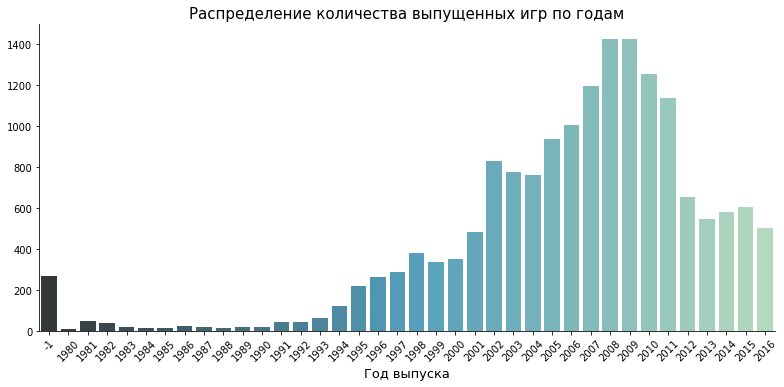

In [17]:
sns.catplot(x='year_of_release', kind='count', data=games, orient="h", palette="GnBu_d", aspect=11/5)
plt.title('Распределение количества выпущенных игр по годам', size=15)
plt.xticks(rotation=45)
plt.xlabel('Год выпуска', size=13)
plt.ylabel('')
plt.show()

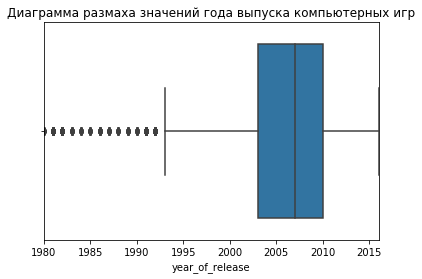

In [18]:
sns.boxplot(games['year_of_release'])
plt.xlim([1980, 2016])
plt.title('Диаграмма размаха значений года выпуска компьютерных игр')
plt.show()

На основе диаграмм распределения и размаха количества выпущенных игр по годам можно утверждать, что значимость для дальнейшего анализа представляет период с 1994-2016гг.

<a id='section3.2'></a>
#### 3.2. Продажи компьютерных игр по платформам в разные годы.

Просмотрим, как менялись продажи игр по платформам. Выберем топ-20 платформ с наибольшими суммарными продажами.

In [19]:
sales = games.pivot_table(index='platform', values='global_sales', aggfunc = 'sum')
# отсортируем сводную таблицу по убыванию по продажам и отфильтруем топ-20 платформ
top_platform = sales.sort_values('global_sales', ascending=False)[:20]
display(top_platform)

,global_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Сформируем датафрейм по платформам с наибольшими продажами компьютерных игр и отфильтруем по году выпуска, начиная с 1994г.

In [20]:
games_sales_top = games.query('platform in @top_platform.index and year_of_release >= 1994')

display(games_sales_top.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Other,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


Постром распределение по годам топ-20 платформ с наибольшими суммарными продажами.

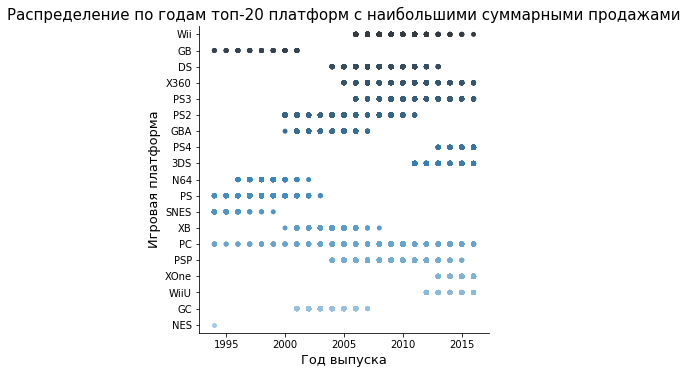

In [21]:
sns.catplot(x="year_of_release", y="platform", jitter=False, data=games_sales_top, palette="Blues_d")

plt.title('Распределение по годам топ-20 платформ с наибольшими суммарными продажами', size=15)
plt.xlabel('Год выпуска', size=13)
plt.ylabel('Игровая платформа', size=13)
plt.show()

Определим, за какой характерный срок появляются новые и исчезают старые платформы. Построим диаграмму размаха времени с момента релиза первой игры до последней для всех игровых платформ.

In [22]:
# сформируем сводные данные с первым и последним годом релиза на различных платформах
games_sales_release = games_sales_top.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
games_sales_release.columns = ['first_year', 'last_year']

# посчитаем длительность с момента выпуска первой игры до последней для каждой платформы
games_sales_release['game_sales_duration'] = games_sales_release['last_year'] - games_sales_release['first_year']

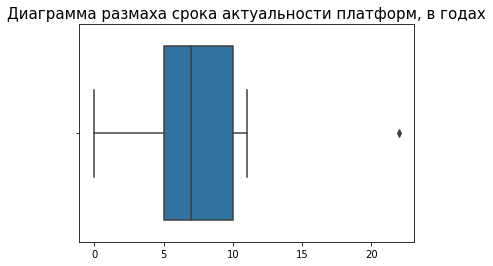

count    19.000000
mean      7.736842
std       4.652862
min       0.000000
25%       5.000000
50%       7.000000
75%      10.000000
max      22.000000
Name: game_sales_duration, dtype: float64

In [23]:
# построим диаграмму размаха значений срока появления до исчезновения игр
sns.boxplot(games_sales_release['game_sales_duration'])
plt.title('Диаграмма размаха срока актуальности платформ, в годах', size=15)
plt.xlabel('')
plt.show()

display(games_sales_release['game_sales_duration'].describe())

На основе полученных данных можно утверждать, что характерный срок, за который появляются и исчезают платформы составляет 7 лет. Основная доля значений длительности актуальности платформы находится в пределах 5-10 лет.

<a id='section3.3'></a>
#### 3.3. Продажи компьютерных игр по платформам в актуальный период.

Исходя из результатов, полученных на предыдущем этапе, в дальнейшем анализе будем использовать данные за актуальный период - 2013-2016гг., что позволит построить прогноз продаж на 2017 год. Рассмотрим это период.

In [24]:
# отфильтруем данные по году выпуска компьютерных игр
actual_data = games_sales_top.query('year_of_release >= 2013')
display(actual_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Other,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Other,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Построим категориальный график распределения мировых продаж компьютерных игр по годам на разных платформах.

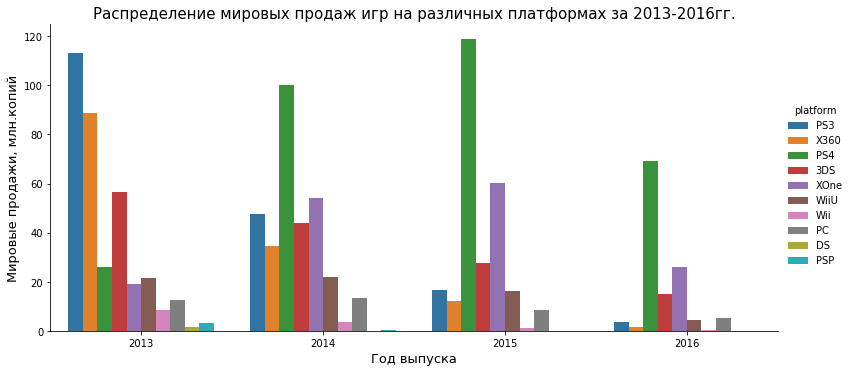

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,4.60,1.52,26.15


In [25]:
sns.catplot(x="year_of_release", y="global_sales", hue="platform",
            kind="bar", ci=None, data=actual_data, aspect = 11/5, estimator=sum)

plt.title('Распределение мировых продаж игр на различных платформах за 2013-2016гг.', size=15)
plt.xlabel('Год выпуска', size=13)
plt.ylabel('Мировые продажи, млн.копий', size=13)
plt.show()

# сформируем сводную таблицу
data_pivot = actual_data.pivot_table(index='year_of_release', columns='platform', values="global_sales", aggfunc='sum')
display(data_pivot)

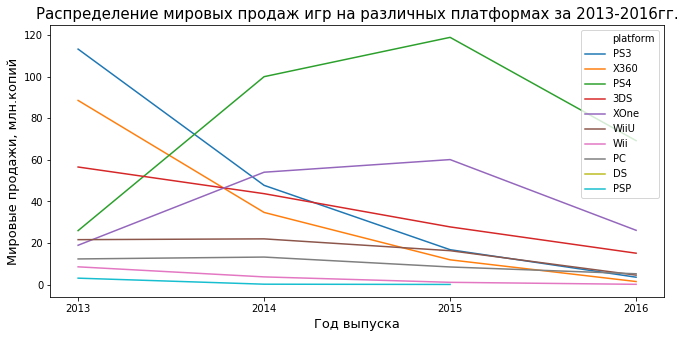

In [26]:
plt.figure(figsize=(11,5))
sns.lineplot(x="year_of_release", y="global_sales", hue="platform", ci=None, data=actual_data, estimator=sum)
plt.xticks(range(2013, 2017))
plt.title('Распределение мировых продаж игр на различных платформах за 2013-2016гг.', size=15)
plt.xlabel('Год выпуска', size=13)
plt.ylabel('Мировые продажи, млн.копий', size=13)
plt.show()

В активной стадии находятся платформы PS4 и XOne, для них наблюдается рост продаж компьютерных игр. Данные платформы потенциально являются наиболее прибыльными для рынка компьютерных игр. Необходимо отметить, что в 2016г. наблюдается снижение общей активности продаж, в том числе PS4 и XOne. Актуальность платформ PS3, X360, 3DS, являющихся лидерами по числу проданных копий в 2013г., ощутимо снизилось за 3 года. По данным за последний год игры на платформах PS3 и X360 практически не выпускались.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

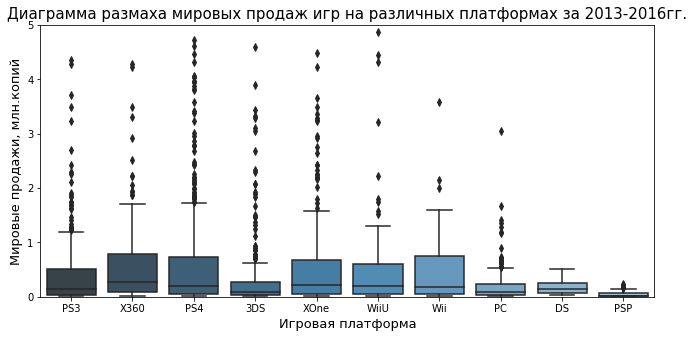

In [27]:
plt.figure(figsize=(11,5))
sns.boxplot(x='platform', y='global_sales', data=actual_data, palette='Blues_d')
plt.ylim(0, 5)

plt.title('Диаграмма размаха мировых продаж игр на различных платформах за 2013-2016гг.', size=15)
plt.xlabel('Игровая платформа', size=13)
plt.ylabel('Мировые продажи, млн.копий', size=13)
plt.show()


На представленной диаграмме размаха значений продаж игр на различных платформах видно, что медиана сдвинута в сторону первого квартиля. Имеется существенный разброс данных, количество выбросов достаточно велико, точки на диаграмме сливаются в сплошную линию практически для всех платформ.

Можно предположить, что такое поведение связано с различными фазами развития игровых платформ. Ранее мы выяснили, что характерный срок, за который появляются и исчезают платформы, составляет 7 лет. Компьютерные игры намного чаще выпускаются для конкретной платформы в период ее актуальности, что приводит к пикам продаж(выбросам) игр. Но это период сменяется фазой снижения популярности платформы. И длительность этого "пассивного" периода выше пика популярности, с чем по-видимому связано стремление медианы в сторону первого квартиля. Кроме того, вклад в разброс значений вносят сами игры, которые выпускаются для платформ. Разница значительная в мировых продажах топовых игр по сравнению с менее популярными играми или играми определенного жанра, направленных на узкий круг потребителя.

Построим сводную таблицу с суммарными мировыми продажами игр в зависимости от платформы за актуальный период.

In [28]:
data_sales_by_platform = actual_data.\
pivot_table(index='platform', values='global_sales', aggfunc='sum')\
.sort_values('global_sales', ascending=False)
display(data_sales_by_platform)

,global_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
Wii,13.66
PSP,3.50


Из представленных платформ лидерами по глобальным продажам компьютерных игр за актуальный период (2013-2016 гг.) по порядку убывания являются PS4, PS3, XOne, 3DS, X360. Несмотря на то, что по среднему значению платформа 3DS характеризуется одним из наиболее низких показателей продаж, данная платформа находится в верхней части списка по суммарным продажам. В топе в рейтинге по среднему показателю продаж являются платформы XOne, X360 и PS4.

<a id='section3.4'></a>
#### 3.4. Зависимость продажи компьютерных игр по платформам от оценок критиков и пользователей.

**1)** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Отфильтруем данные от помеченных ранее "-1" неопределенных оценок критиков и пользователей.

In [29]:
actual_data_score = actual_data[(actual_data['user_score'] != -1.0) & (actual_data['critic_score'] != -1.0)]

Создадим функцию для расчета коэффициента корреляции между глобальными продажами и оценками пользователей и критиков для платформы. Функция выводит на экран коэффициент корреляции и строит  диаграмму рассеяния зависимости между отзывами и продажами. 

In [30]:
def platform_score(platform_id):
    print('{}:'.format(platform_id))
    # фильтруем данные по конкретной платформе
    platform_data = actual_data_score[actual_data_score['platform'] == platform_id]
    # выводим диаграмму рассеяния
    for col in ['user_score', 'critic_score']:
        plt.figure(col)
        sns.scatterplot(x=col, y='global_sales', data=platform_data)
        plt.title('Зависимость между мировыми продажами игр и ' + str(col) + ' для платформы ' + str(platform_id), size=15)
        if col == 'user_score':
            plt.xlabel('Оценка пользователей', size=13)
        else:
            plt.xlabel('Оценка критиков', size=13)
        plt.ylabel('Мировые продажи, млн.копий', size=13)
        
        # рассчитаем коэффициент корреляции для оценок пользователей и критиков
        corr = platform_data['global_sales'].corr(platform_data[col])
        print('Коэффициент корреляции между мировыми продажами игр и '+ str(col) + ' составляет: {:.2f}'.format(corr))

Основываясь на результатах, полученных в предыдущем разделе, популярной игровой платформой является PS4. Построим для неё диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

PS4:
Коэффициент корреляции между мировыми продажами игр и user_score составляет: -0.03
Коэффициент корреляции между мировыми продажами игр и critic_score составляет: 0.41


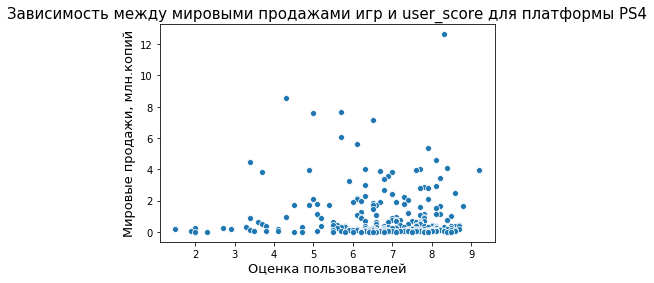

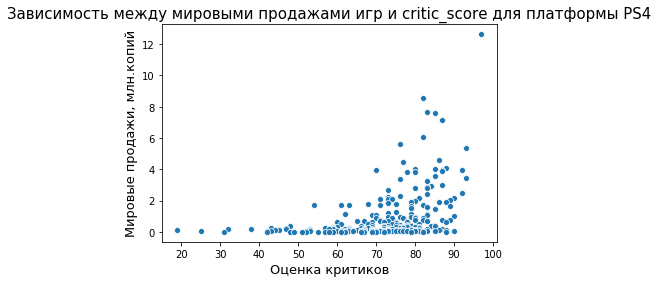

In [31]:
platform_score('PS4')

Наблюдается прямая зависимость между глобальными продажами компьютерных игр на платформе PS4 от оценки критиков, коэффициент корреляции составляет **0.41**. Тогда как отзывы пользователей не влияют на продажи игр, коэффициент корреляции практически равен **0**.

**2)** Посмотрим зависимость глобальных продаж от оценок пользователей и критиков для других платформ из топ-5 по суммарным глобальным продажам: PS3, XOne, 3DS, X360.

PS3:
Коэффициент корреляции между мировыми продажами игр и user_score составляет: 0.02
Коэффициент корреляции между мировыми продажами игр и critic_score составляет: 0.33


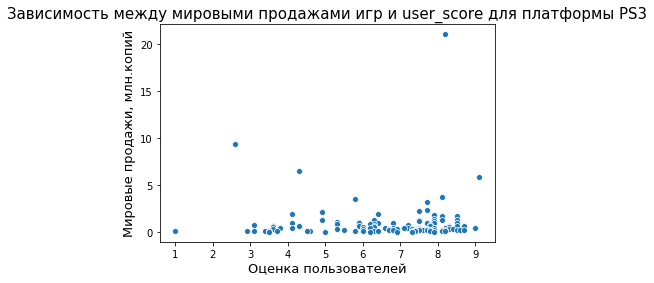

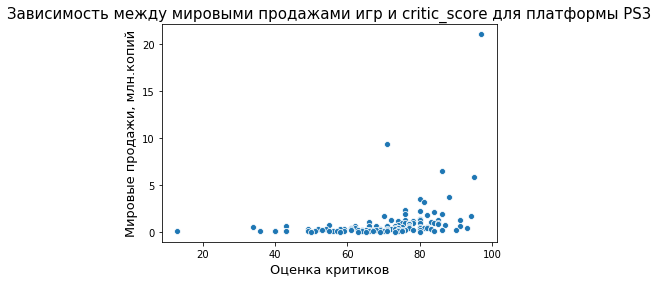

XOne:
Коэффициент корреляции между мировыми продажами игр и user_score составляет: -0.09
Коэффициент корреляции между мировыми продажами игр и critic_score составляет: 0.41


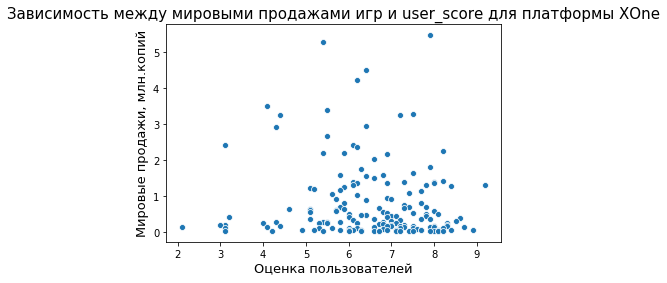

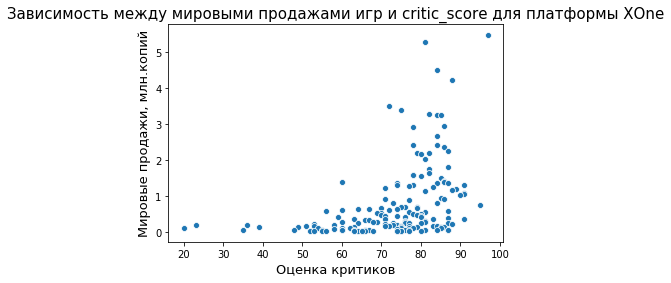

3DS:
Коэффициент корреляции между мировыми продажами игр и user_score составляет: 0.27
Коэффициент корреляции между мировыми продажами игр и critic_score составляет: 0.34


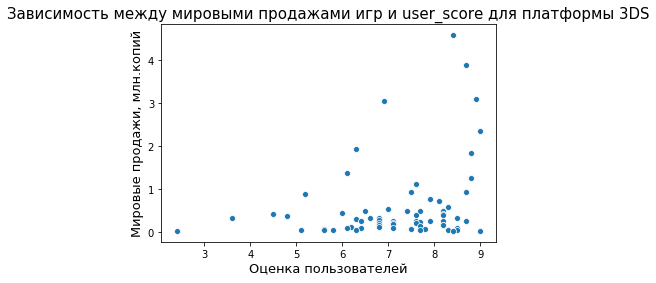

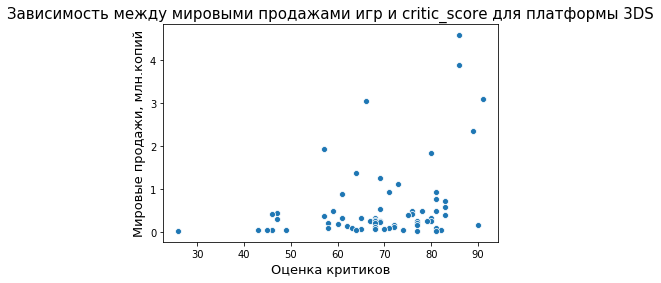

X360:
Коэффициент корреляции между мировыми продажами игр и user_score составляет: -0.01
Коэффициент корреляции между мировыми продажами игр и critic_score составляет: 0.35


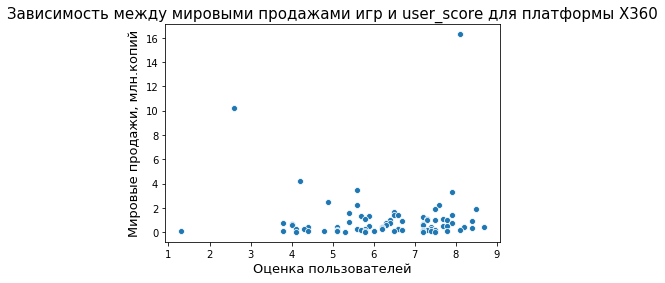

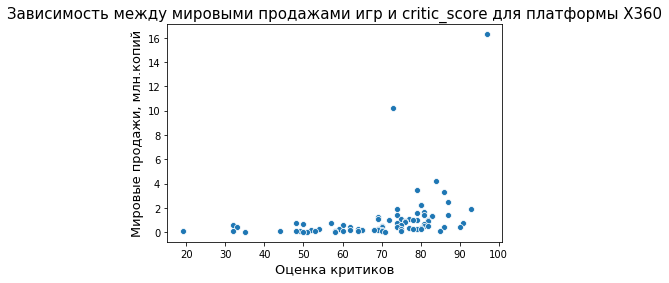

In [32]:
for pl in ['PS3', 'XOne', '3DS', 'X360']:
    platform_score(pl)
    plt.show()

Зависимость глобальных продаж от оценок критиков и пользователей аналогична для остальных платформ. Таким образом, можно утверждать, что мировые продажи компьютерных игр на различных платформах не зависят от отзывов пользователей. Существует средняя прямая связь между продажами и оценок критиков, коэффициент корреляции колеблется в интервале **0.3-0.4**.

<a id='section3.5'></a>
#### 3.5. Распределение компьютерных игр по жанрам.

Рассмотрим распределени игр по жанрам, определим число релизов игр для каждого жанра и суммарные мировые продажи.

In [33]:
# сформируем сводную таблицу с группировкой по жанру
data_sales_by_genre = actual_data.\
pivot_table(index='genre', values='global_sales', aggfunc=['count', 'sum'])
data_sales_by_genre.columns = ['release_number', 'global_sales']

# отсортируем полученные данные по убыванию мировых продаж
data_sales_by_genre = data_sales_by_genre.sort_values(by='global_sales', ascending=False)

display(data_sales_by_genre)

,release_number,global_sales
genre,,
Action,641,312.15
Shooter,185,231.54
Sports,197,148.57
Role-Playing,214,135.66
Misc,136,58.97
Platform,68,42.16
Racing,82,39.79
Fighting,70,34.12
Simulation,59,21.71


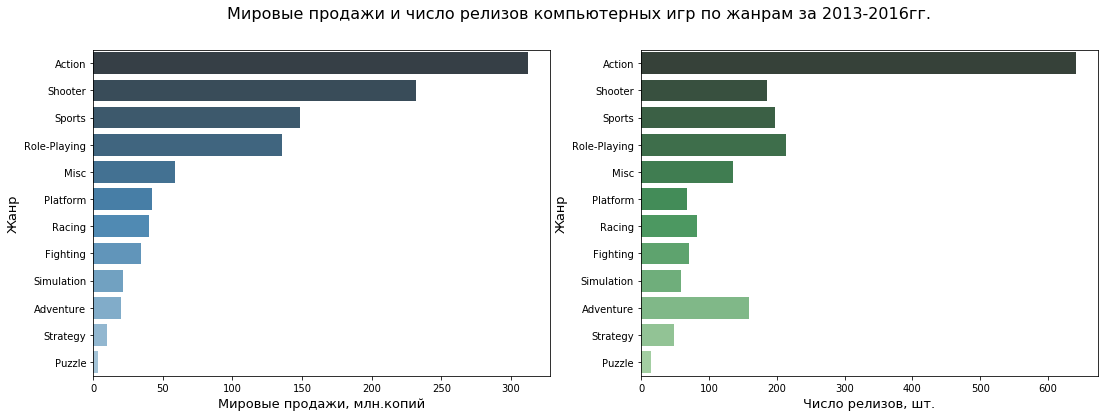

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))


sns.barplot(y= data_sales_by_genre.index, x= 'global_sales', data=data_sales_by_genre, palette = "Blues_d", ax=axs[0])
axs[0].set_xlabel('Мировые продажи, млн.копий', size=13)
axs[0].set_ylabel('Жанр', size=13)
fig.suptitle('Мировые продажи и число релизов компьютерных игр по жанрам за 2013-2016гг.', size=16)


sns.barplot(y= data_sales_by_genre.index, x= 'release_number', data=data_sales_by_genre, palette = "Greens_d", ax=axs[1])
axs[1].set_xlabel('Число релизов, шт.', size=13)
axs[1].set_ylabel('Жанр', size=13)


plt.show()

Из построенных за актуальный период диаграмм, что абсолютным лидером по количеству выпущенных игр и наиболее прибыльным является жанр Action. Первые 3 места с ним разделяют жанры Shooter и Sports. Наименьшей популярностью пользуются игры Strategy и Puzzle. Интересно отметить, что из общей закономерности выбиваются игры в жанре Adventure и Shooter. Игры в жанре Приключения по мировым продажам находятся в конце списка, несмотря на то, что число выпущенных игр находится на пятом месте среди всех жанров. Для игр в жанре Shooter число релизов более чем в 3 раза меньше лидера, по этому показателю жанр находится на четвертой строчке. Однако по мировым продажам занимает уверенное второе место.

### Часть 4. Составление портрета пользователя каждого региона

Создадим функцию для формирования сводной таблицы по топ-5 популярным платформам и жанрам в Северной Америке, Европе и Японии.

In [35]:
def group_data_region(group_type):
    dfs=[]
    for column in ['na_sales', 'eu_sales', 'jp_sales']:
        region = actual_data.\
        pivot_table(index=group_type, values=column, aggfunc='sum').\
        sort_values(column, ascending=False)[:5]
    
        dfs.append(region)
        
    return pd.DataFrame().join(dfs, how="outer")

<a id='section4.1'></a>
#### 4.1. Самые популярные платформы (топ-5) в Северной Америке, Европе и Японии.

Определим топ-5 платформ по продажам компьютерных игр в Северной Америке, Европе и Японии. Построим круговую диаграмму с долями продаж для вышеуказанных регионов.

In [36]:
group_region_platform = group_data_region('platform')
display(group_region_platform)

,na_sales,eu_sales,jp_sales
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
WiiU,NaN,NaN,10.88
PSP,NaN,NaN,3.29


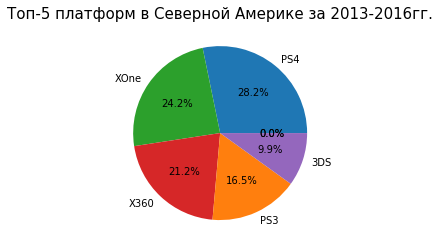

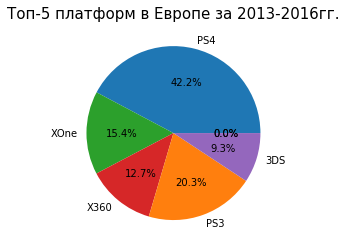

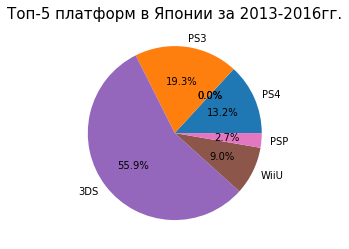

In [37]:
# создадим словарь с соответствующими цветами для игровых платформ
cdict = {'PS4': 'C0', 'PS3': 'C1', 'XOne': 'C2', 'X360': 'C3', '3DS': 'C4', 'WiiU': 'C5', 'PSP': 'C6'}

# построим круговые диаграммы для топ-5 платформ по регионам
for region in group_region_platform.columns:
    plt.figure(region)
    df = group_region_platform.loc[:, region]
    colors = [cdict[x] for x in df.index]
    df.plot(kind='pie', colors=colors, subplots=True, legend=False, autopct='%1.1f%%')
    plt.ylabel('')
    if region == 'na_sales':
        plt.title('Топ-5 платформ в Северной Америке за 2013-2016гг.', size=15)
    if region == 'eu_sales':
        plt.title('Топ-5 платформ в Европе за 2013-2016гг.', size=15)
    if region == 'jp_sales':
        plt.title('Топ-5 платформ в Японии за 2013-2016гг.', size=15)
    
plt.show()

Видно, что для Европы и Северной Америки наблюдается cхожая тенденция распределения топ-5 платформ, меняется только их соотношение. Наименее популярной платформой является 3DS, доля на рынке игр составляет ~10%. В Европе подавляющее большинство занимает платформа PS4, доля из топ-5 составляет более 42%. В США и Канаде данная платформа также занимает лидирующее место, но соотношение первых 3 платформ (PS4, XOne, X360) примерно одинаковое. Доля платформы PS3 почти не зависит от региона и составляет примерно 1/5.

Для Японии ситуация с распределением топ-5 платформ значительно отличается. Абсолютным лидером является 3DS, ее доля составляет ~56%, тогда как в других регионах платформа находится на последнем месте. Лидер для Запада - PS4 - занимает только 13%.  Для Японии достаточной популярностью обладает платформа WiiU (9%), которая не вошла в топ-5 на Западе. Все еще выходят игры на платформе PSP (3%), популярность которой по всему миру значительно снизилась после 2013 года.

<a id='section4.2'></a>
#### 4.2. Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии.

Определим топ-5 жанров компьютерных игр в Северной Америке, Европе и Японии. Построим круговую диаграмму с долями продаж.

In [38]:
group_region_genre = group_data_region('genre')
display(group_region_genre)

,na_sales,eu_sales,jp_sales
Action,125.05,116.15,34.62
Shooter,109.22,87.31,6.56
Sports,64.92,59.80,NaN
Role-Playing,44.83,35.93,44.20
Misc,26.94,NaN,7.16
Racing,NaN,20.18,NaN
Fighting,NaN,NaN,7.00


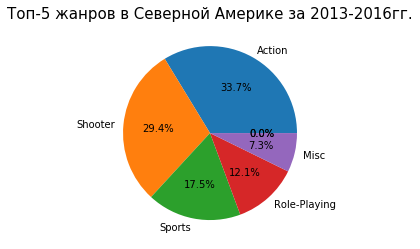

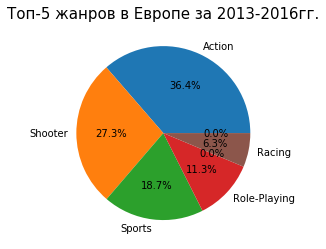

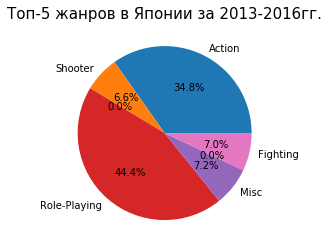

In [39]:
cdict = {'Action': 'C0', 'Shooter': 'C1', 'Sports': 'C2', 'Role-Playing': 'C3', 'Misc': 'C4', 'Racing': 'C5', 'Fighting': 'C6'}

for region in group_region_genre.columns:
    plt.figure(region)
    df = group_region_genre.loc[:, region]
    colors = [cdict[x] for x in df.index]
    df.plot(kind='pie', colors=colors, subplots=True, legend=False, autopct='%1.1f%%')
    plt.ylabel('')
    if region == 'na_sales':
        plt.title('Топ-5 жанров в Северной Америке за 2013-2016гг.', size=15)
    if region == 'eu_sales':
        plt.title('Топ-5 жанров в Европе за 2013-2016гг.', size=15)
    if region == 'jp_sales':
        plt.title('Топ-5 жанров в Японии за 2013-2016гг.', size=15)
    
plt.show()

Распределение топ-5 жанров игр в Европе и Северной Америке также примерно одинаковое. Первые 4 жанра -Action, Shooter, Sports, Role-Playing совпадают по долям. Отличие состоит только в последнем жанре, для США и Канады - Misc, для Европы - Racing.

В Японии почти 80% жанров составляет Role-Playing и Action - 44.4% и 34.8%, соответственно. Игры в категории Sports не пользуются спросом, видимо из-за низкой популярности футбола, баскетбола и хоккея. Но жанр Fighting привлекает покупателей игр, доля из топ-5 составляет 7%.

<a id='section4.3'></a>
#### 4.3. Зависимость продаж игр в Северной Америке, Европе и Японии от рейтинга ESRB.

Организация ESRB (англ. Entertainment Software Rating Board) определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию (https://www.esrb.org/ratings-guide/).

Рейтинги ESRB:
- E - от 6 лет;
- E10+ - от 10 лет;
- T - от 13 лет;
- M - от 17 лет.

Сформируем датафрейм с суммарными продажами игр в Северной Америке, Европе и Японии по возрастным категориям, исходя из классификации ESRB.

In [40]:
# отфильтруем данные от неопределенного рейтинга
actual_rating_data = actual_data.query('rating != "Other"')
# создадим сводные таблицы для каждого региона
dfs=[]
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_rating_data.\
    pivot_table(index='rating', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    
    dfs.append(region)
    
# объединим таблицы        
group_region_rating = pd.DataFrame().join(dfs, how="outer")
display(group_region_rating)

,na_sales,eu_sales,jp_sales
M,163.78,144.18,12.69
E,78.52,82.36,15.08
E10+,53.84,41.44,5.61
T,48.39,40.73,15.51


Изобразим распределение по возрастным категориям на круговой диаграмме.

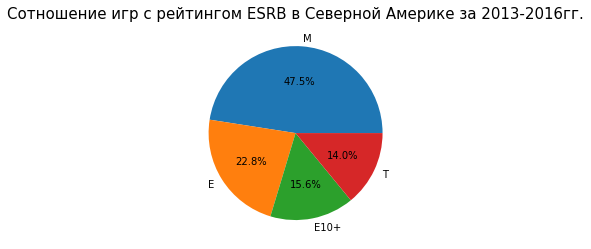

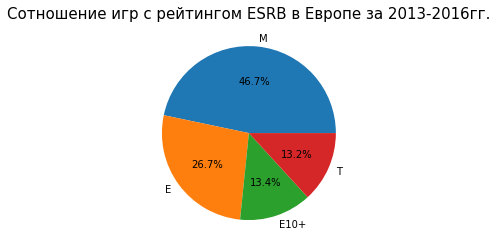

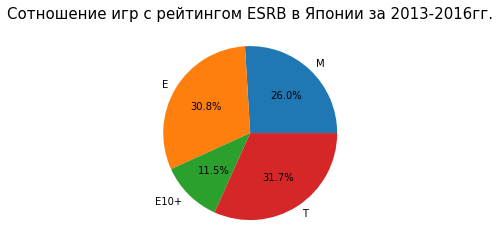

In [41]:
cdict = {'M': 'C0', 'E': 'C1', 'E10+': 'C2', 'T': 'C3'}

for region in group_region_rating:
    plt.figure(region)
    df = group_region_rating.loc[:, region]
    colors = [cdict[x] for x in df.index]
    df.plot(kind='pie', colors=colors, subplots=True, legend=False, autopct='%1.1f%%')
    plt.ylabel('')
    if region == 'na_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Северной Америке за 2013-2016гг.', size=15)
    if region == 'eu_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Европе за 2013-2016гг.', size=15)
    if region == 'jp_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Японии за 2013-2016гг.', size=15)
    
plt.show()

Запад и Восток существенно отличаются по популярности игр в зависимости от возрастной категории. Примерно равную долю в независимости от региона занимают лишь игры для детей от 10 лет(E10+).

В США, Канаде и Европе 50% составляют игры для пользователей старше 17 лет. Примерно четверть занимают игры для детей младшего возраста.

В Японии же игры распределены примерно в равных долях для детей младшего возраста (E), для взрослых (M) и для подростков (T).

In [42]:
# отфильтруем данные от неопределенного рейтинга
#actual_rating_data = actual_data.query('rating != "Other"')
# создадим сводные таблицы для каждого региона
dfs=[]
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_data.\
    pivot_table(index='rating', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    
    dfs.append(region)
    
# объединим таблицы        
group_region_rating = pd.DataFrame().join(dfs, how="outer")
display(group_region_rating)

,na_sales,eu_sales,jp_sales
M,163.78,144.18,12.69
Other,88.14,77.42,73.30
E,78.52,82.36,15.08
E10+,53.84,41.44,5.61
T,48.39,40.73,15.51


Изобразим распределение по возрастным категориям на круговой диаграмме.

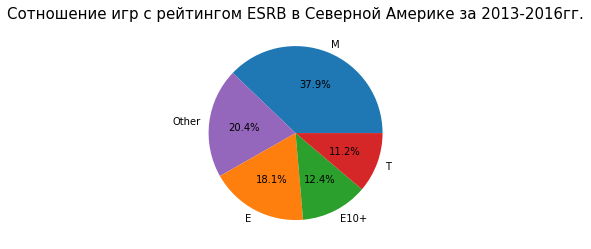

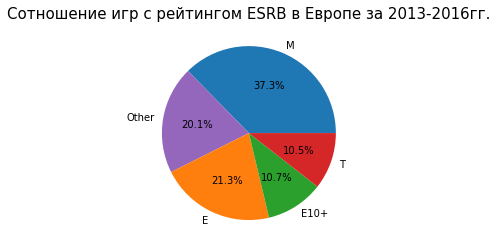

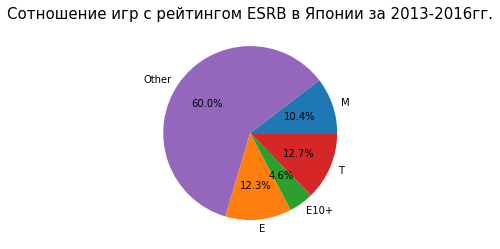

In [43]:
# добавил цвет для категории "Другой"
cdict = {'M': 'C0', 'E': 'C1', 'E10+': 'C2', 'T': 'C3', 'Other': 'C4'}

for region in group_region_rating:
    plt.figure(region)
    df = group_region_rating.loc[:, region]
    colors = [cdict[x] for x in df.index]
    df.plot(kind='pie', colors=colors, subplots=True, legend=False, autopct='%1.1f%%')
    plt.ylabel('')
    if region == 'na_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Северной Америке за 2013-2016гг.', size=15)
    if region == 'eu_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Европе за 2013-2016гг.', size=15)
    if region == 'jp_sales':
        plt.title('Сотношение игр с рейтингом ESRB в Японии за 2013-2016гг.', size=15)
    
plt.show()

Для Северной Америки и Европы доля игр с неизвестным рейтингом одинакова и составляет 20%. В Японии же доля игр с неустановленным рейтингом ESRB значительна - 60%. Можно предположить, что это связано с особенностями регламентирования игр и наличием в Японии своей рейтинговой организации.

### Часть 5. Статистический анализ данных

В данном тесте будет использоваться статистический критерий Стьюдента, так как необходимо проверить гипотезу о равенстве средних значений в двух независимых выборках. Для применения данного критерия в каждом случае проверим, подчиняются ли данные нормальному распределению.

Отфильтруем данные от строк с неопределенным рейтингом пользователей.

In [44]:
data_user_score = actual_data[actual_data['user_score'] != -1.0]

<a id='section5.1'></a>
#### 5.1. Проверка гипотезы №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы. Зададим пороговое значение *aplha* = 5%.


$H_0$ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

$H_1$ - cредние пользовательские рейтинги платформ Xbox One и PC различаются.

α = 5%

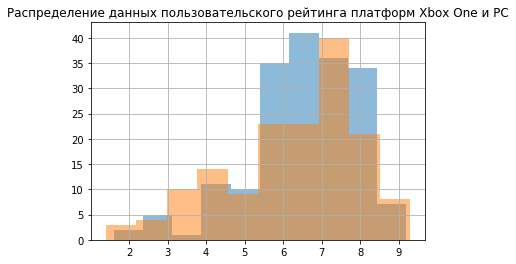

In [45]:
# сформируем данные для платформ Xbox и PC                              
xbox_one = data_user_score[data_user_score['platform'] == 'XOne']['user_score']
pc = data_user_score[data_user_score['platform'] == 'PC']['user_score']

# построим гистограмму распределения для платформ Xbox и PC 
xbox_one.hist(alpha = .5)
pc.hist(alpha = .5)
plt.title("Распределение данных пользовательского рейтинга платформ Xbox One и PC")
plt.show()

Данные пользовательского рейтинга платформ характеризуется нормальным распределением, что позволяет использовать для статистического анализа критерий Стьюдента.

In [46]:
#Рассчитаем дисперсию значений пользовательского рейтинга платформ Xbox One и PC
xbox_one_variance = np.var(xbox_one)
pc_variance = np.var(pc) 

display(xbox_one_variance, pc_variance)

alpha = .05
# максимальная оценка пользователей - 10, дисперсии для платформ отличаются более чем на 1
# установим параметр equal_var = False
results = st.ttest_ind(xbox_one, pc, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8965188383045526

3.016306347554631

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [47]:
stat_platform = data_user_score.query('platform == "XOne" or platform == "PC"')
display(stat_platform.pivot_table(index='platform', values='user_score'))

,user_score
platform,
PC,6.269677
XOne,6.521429


Полученные в ходе анализа данные не противоречат нулевой гипотезе, что cредние пользовательские рейтинги платформ Xbox One и PC совпадают, и у нас нет оснований отбросить её. Действительно, средняя оценка пользователей платформ Xbox One и PC практически не отличаются и равны 6.52 и 6.27, соответственно.

<a id='section5.2'></a>
#### 5.2. Проверка гипотезы №2.  Средние пользовательские рейтинги жанров Action и Sports  разные.

Сформулируем нулевую и альтернативную гипотезы. Зададим пороговое значение *aplha* = 5%.

$H_0$ - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

$H_1$ - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

α = 5%

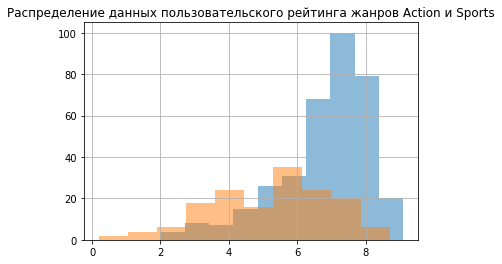

In [48]:
# отфильтруем данные для жанров Action и Sports
action = data_user_score[data_user_score['genre'] == 'Action']['user_score']
sports = data_user_score[data_user_score['genre'] == 'Sports']['user_score']

# построим гистограмму распределения для жанров Action и Sports 
action.hist(alpha = .5)
sports.hist(alpha = .5)
plt.title("Распределение данных пользовательского рейтинга жанров Action и Sports")
plt.show()

Данные пользовательского рейтинга жанров Action и Sports характеризуется нормальным распределением, что позволяет использовать для статистического анализа критерий Стьюдента.

In [49]:
#Рассчитаем дисперсию значений пользовательского рейтинга жанров Action и Sports
action_variance = np.var(action)
sports_variance = np.var(sports) 

display(action_variance, sports_variance)

alpha = .05
# максимальная оценка пользователей - 10, дисперсии для жанров отличаются в ~ 1.5 раза
# установим параметр equal_var = False
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.7625118598046254

3.021883038501561

p-значение: 1.1105534658181278e-19
Отвергаем нулевую гипотезу


In [50]:
stat_genre = data_user_score.query('genre == "Action" or genre == "Sports"')
display(stat_genre.pivot_table(index='genre', values='user_score'))

,user_score
genre,
Action,6.784078
Sports,5.225161


С вероятностью 95% можно утверждать, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются. Обнаружено, что оценки пользователей отличаются на ~1.5 балла при максимальной - 10 баллов. Рейтинги жанров Action и Sports равны 6.78 и 5.23, соответственно.

### Заключение

По результатам исследования данных о продажах игр, оценках пользователей и экспертов, жанров и игровых платформ за 2016 год выявлены следующие закономерности успешности игры:
1. Характерный срок, за который появляются и исчезают платформы составляет 7 лет. Основная доля длительности актуальности платформы находится в пределах 5-10 лет.
2. Если ориентироваться на глобальные продажи компьютерных игр, актуальными являются платформы PS4 и Xbox One. Данные платформы потенциально являются наиболее прибыльными для рынка компьютерных игр. Для продаж игр в Европе и Северной Америке игра должна быть разработана для PS4 и Xbox One, в Японии - 3DS и WiiU. Платформа PS3 хоть и занимает 16-20% рынка игр на западном рынке и в Японии, к 2016 году актуальность данной платформы значительно снизилась.
3. На мировом рынке абсолютным лидером по количеству выпущенных игр и наиболее прибыльным является жанр Action. Первые 3 места с ним разделяют жанры Shooter и Sports. В Европе и Северной Америке наиболее популярные жанры - Action, Shooter, Sports, Role-Playing. В Японии основную долю жанров составляет Role-Playing и Action. Игры в категории Sports не пользуются спросом в Японии, вероятно из-за низкой популярности распространенных на Западе групповых видов спорта - футбола, баскетбола и хоккея. Но жанр Fighting привлекает покупателей игр, доля из топ-5 составляет 7%.
4. Мировые продажи компьютерных игр на различных платформах не зависят от отзывов пользователей. Существует средняя прямая связь между продажами и оценками критиков, коэффициент корреляции находится в интервале 0.3-0.4. На основе статистического анализа данных установлено, что cредние пользовательские рейтинги платформ Xbox One и PC не отличаются. С вероятностью 95% можно утверждать, что cредние пользовательские рейтинги жанров Action и Sports различаются. Обнаружено, что оценки пользователей отличаются на ~1.5 балла при максимальной - 10 баллов.
5. Возрастной рейтинг ESRB. Примерно равную долю в независимости от региона занимают лишь игры для детей от 10 лет(E10+). В США, Канаде и Европе 50% составляют игры для пользователей старше 17 лет(M). Примерно четверть занимают игры для детей младшего возраста(E). В Японии же игры распределены примерно в равных долях для детей младшего возраста(E), для взрослых(M) и для подростков(T). Однако, необходимо учитывать ограниченность жанров в случае игр в категории E.